# Simulation of Variance Calculation: Why We Divide by (n - 1)

>Objective: In this project, I have developed a Python program to simulate variance calculation for sample data. The objective is to clarify why we use 𝑛−1 instead of 𝑛 when determining the variance of a sample. This simulation will illustrate the concept of unbiased estimation in statistics.

### 1. Importing Libraries

I imported the **random** module to generate random numbers and samples, and the **matplotlib.pyplot** module to create plots for visualizing the results of my simulations.

In [2]:
import random
import matplotlib.pyplot as plt

### 2. Generating the Population Dataset
I generated a synthetic population dataset with a size of 1000. Each data point is a random integer between 1 and 1000.<br>This simulated population dataset serves as the basis for drawing samples and calculating variances.

In [3]:
population_size = 1000
population = [random.randint(1, 1000) for _ in range(population_size)]

### 3. Defining Functions for Variance Calculation
I defined two functions for variance calculation: **population_variance** and **sample_variance**.
- The **population_variance** function computes the variance by dividing the sum of squared deviations from the mean by 𝑛, where 𝑛 is the total number of data points. 
- In contrast, the **sample_variance** function divides by 𝑛−1, correcting for bias in the variance estimate from a sample.
This adjustment ensures an unbiased estimate of the population variance, which is essential for accurate statistical analysis.

In [1]:
def population_variance(data):
    mean = sum(data) / len(data)
    squared_nums = [(x - mean) ** 2 for x in data]
    variance = sum(squared_nums) / len(data)
    return mean, variance

In [2]:
def sample_variance(data):
    mean = sum(data) / len(data)
    squared_nums = [(x - mean) ** 2 for x in data]
    variance = sum(squared_nums) / (len(data) - 1)
    return mean, variance

### 4. Drawing Random Samples
This function selects a random sample of a specified size from the population dataset.<br>I used **random.sample** to ensure that each sample is a simple random sample without replacement.

In [6]:
def draw_sample(population, sample_size):
    return random.sample(population, sample_size)

### 5. Calculating the Population Variance

I computed the population variance using the **population_variance** function, which serves as a reference for comparing the sample variances.

In [7]:
_, pop_variance = population_variance(population)

### 6. Simulating Variance for Different Sample Sizes

I simulated variances for various sample sizes ranging from 10 to 1000. 
For each sample size, I have drawn 100 random samples, calculated their variances, and then computed the average sample variance for that size.
This process helps me observe how the sample size affects the accuracy of the variance estimate.

In [8]:
sample_sizes = []
for size in range(10, 1010, 10):
    sample_sizes.append(size)
num_samples = 100

In [9]:
average_sample_variances = []

for size in sample_sizes:
    sample_variances = []

    for _ in range(num_samples):
        sample = draw_sample(population, size)
        _, sample_variance_value = sample_variance(sample)
        sample_variances.append(sample_variance_value)

    average_variance = sum(sample_variances) / len(sample_variances)
    average_sample_variances.append(average_variance)

### 7. Plotting the Results
By using **matplotlib.pyplot** to create a plot, we can observe the average sample variance for different sample sizes, demonstrating the concept of unbiased estimation.

The graph illustrates how the average sample variance approaches the population variance as the sample size increases, highlighting that larger samples provide more accurate estimates. It also shows that **smaller samples tend to underestimate** the population variance due to their limited representation of the entire population.

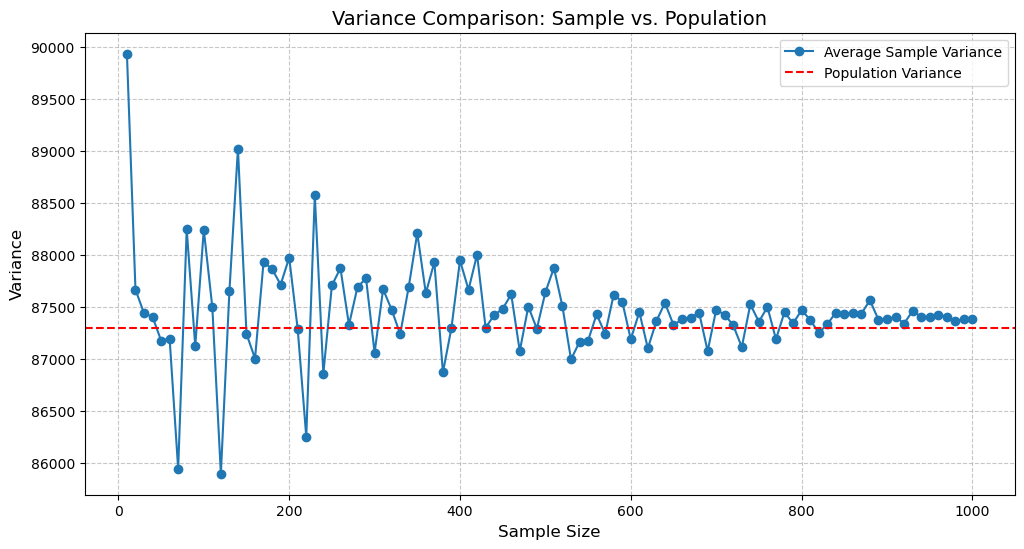

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(sample_sizes, average_sample_variances, marker='o', linestyle='-', label='Average Sample Variance')
plt.axhline(y=pop_variance, color='r', linestyle='--', label='Population Variance')
plt.xlabel('Sample Size', fontsize=12)
plt.ylabel('Variance', fontsize=12)
plt.title('Variance Comparison: Sample vs. Population', fontsize=14)
plt.legend()

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Conclusion

In this project, I demonstrated that **small samples often underestimate the variance of a larger population**. For example, **a sample of 10 individuals might show a smaller range of heights than the entire group** because it might not include the extreme values, such as the tallest or shortest individuals. Consequently, **this smaller sample may not fully capture the diversity of the population**.

To address this issue, the effectiveness of **Bessel’s correction** (using (𝑛—1)) is evident, as it adjusts for bias and improves the accuracy of variance estimates, particularly with larger sample sizes.

**This correction helps to adjust for the bias and provides a more accurate estimate of the population variance**. The correction becomes increasingly essential with larger sample sizes to ensure that the sample variance more closely aligns with the actual population variance.